In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
## Wind generation buildings in DE

DE_renew = pd.read_csv("data/renewable_power_plants_DE.csv")

DE_renew.groupby(level=[0,1].count([0]))
DE_dict = DE_renew['energy_source_level_2'].value_counts().to_dict()

print(DE_dict['Wind'])

29543


## saving the wind generation data (the target variable) into dataframes

In [15]:
windgenerationdata = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('DE_wind_generation')),
                        parse_dates=[0], index_col=0)

## saving the wind weather data (the features) into dataframes

In [13]:
windspeed = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('DE_windspeed')),
                parse_dates=[0], index_col=0)

In [5]:
windspeedDK = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('DK_windspeed')),
                parse_dates=[0], index_col=0)


In [6]:

windgenDK = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('DK_wind_onshore_generation')),
                        parse_dates=[0], index_col=0)

## Next two cells are identical in purpose but if you get a tz-naive error you need to run the other block of code. The block of code needed differs based on system

In [4]:
#start_remove = pd.to_datetime('2016-01-01')
#end_remove = pd.to_datetime('2017-01-01')

#start_test = pd.to_datetime('2015-01-01')
#end_test = pd.to_datetime('2016-01-01')

In [7]:
start_remove = pd.to_datetime('2016-01-01', utc = True)
end_remove = pd.to_datetime('2017-01-01', utc = True)

start_test = pd.to_datetime('2015-01-01', utc = True)
end_test = pd.to_datetime('2016-01-01', utc = True)

## Limiting the data to just data from 2015 & 2016. Only these two years are consistent for most of the regions. Other years may be missing generation data

In [21]:
#creating training data but cutting the data based on time stamp
windspeedformatted = windspeed.loc[(windspeed.index >= start_remove)]
windgenerationdataformatted = windgenerationdata.loc[(windgenerationdata.index >= start_remove) & (windgenerationdata.index < end_remove)]

In [16]:
#creating test/comparison data
windspeedtest = windspeedDK.loc[(windspeedDK.index >= start_test) & (windspeed.index < end_test)]
windgenerationtest = windgenerationdata.loc[(windgenDK.index >= start_test) & (windgenerationdata.index < end_test)]

In [17]:
windspeedDKtest = windspeedDK.loc[(windspeedDK.index >= start_test) & (windspeedDK.index < end_test)]
windgenDKtest = windgenDK.loc[(windgenDK.index >= start_test) & (windgenDK.index < end_test)]

In [42]:
DKCOUNT2015Array = np.zeros(8760)
DKCOUNT2015Array.fill(214)
windspeedDKtest['Wind'] = DKCOUNT2015Array
#DKCOUNT2016Array = np.zeros(8784)
#DKCOUNT2016Array.fill(214)
#windspeedDKtrain['Wind'] = DKCOUNT2016Array

DECOUNT2015Array = np.zeros(8760)
DECOUNT2015Array.fill(29543)
windspeedtest['Wind'] = DECOUNT2015Array
DECOUNT2016Array = np.zeros(8784)
DECOUNT2016Array.fill(29543)
windspeedformatted['Wind'] = DECOUNT2016Array


windspeedformatted

C:\Users\ezhu2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ezhu2\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ezhu2\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,DE_windspeed_10m,Wind
utc_timestamp,,
2016-01-01 00:00:00+00:00,3.3849,29543.0
2016-01-01 01:00:00+00:00,3.3636,29543.0
2016-01-01 02:00:00+00:00,3.3268,29543.0
2016-01-01 03:00:00+00:00,3.2796,29543.0
2016-01-01 04:00:00+00:00,3.1705,29543.0
...,...,...
2016-12-31 19:00:00+00:00,4.2129,29543.0
2016-12-31 20:00:00+00:00,4.2875,29543.0
2016-12-31 21:00:00+00:00,4.2965,29543.0


## The energy generation data is measured in Mega Watts and even then has a large magnitude. Here changing the magnitude so that it's in Giga Watts

In [23]:
windgenerationdataformatted = windgenerationdataformatted * 1e-3

In [24]:
windgenerationtest = windgenerationtest * 1e-3

In [58]:
windgenDKtest = windgenDKtest * 1e-3

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [11]:
#attempt at cross validation

# from sklearn.model_selection import cross_val_score

# model = LinearRegression()

# scores_wind = cross_val_score(model, windspeedformatted, windgenerationdataformatted, cv=5)
# print(scores_wind, "\naverage =", np.mean(scores_wind))

In [12]:
# import sklearn.model_selection

# nfold = 10
# kf = sklearn.model_selection.KFold(n_splits = nfold, shuffle = True)

# dtest = np.arange(0, 10)
# nd = len(dtest)

# RSSts = np.zeros((nd, nfold))

# for isplit, Ind in enumerate(kf.split(windspeedformatted)):
#     Itr, Its = Ind
#     xtr = windspeedformatted[Itr]
#     ytr = windgenerationdataformatted[Itr]
#     xts = windspeedformatted[Its]
#     yts = windgenerationdataformatted[Its]
    
#     for it, d in enumerate(dtest):
#         beta_hat = poly.polyfit(xtr, ytr, d)
        
#         yhat = poly.polyval(xts, beta_hat)
#         RSSts[it, isplit] = np.mean((yhat-yts) ** 2)

In [59]:
#function to print out generation averages for hour and day. This is used as a visual representation of the data
#later will throw train data and predicted data to see how they fair
#summing up all the hourly generation numbers to product the total production for the year
#then doing division for the averages
def energy_production(energy):
    total_energy = np.sum(energy)
    avg_energy_per_hour = total_energy / energy.shape[0]
    avg_energy_per_day = total_energy / (energy.shape[0] / 24)
    print("Energy Data measured in Giga Watts")
    print("Total energy:", total_energy)
    print("Average Energy Per Hour:", avg_energy_per_hour)
    print("Average Energy Per Day:", avg_energy_per_day)

In [60]:
# fitting the model with the features and target variables
model = LinearRegression().fit(windspeedformatted,windgenerationdataformatted)
print(windspeedformatted)

                           DE_windspeed_10m     Wind
utc_timestamp                                       
2016-01-01 00:00:00+00:00            3.3849  29543.0
2016-01-01 01:00:00+00:00            3.3636  29543.0
2016-01-01 02:00:00+00:00            3.3268  29543.0
2016-01-01 03:00:00+00:00            3.2796  29543.0
2016-01-01 04:00:00+00:00            3.1705  29543.0
...                                     ...      ...
2016-12-31 19:00:00+00:00            4.2129  29543.0
2016-12-31 20:00:00+00:00            4.2875  29543.0
2016-12-31 21:00:00+00:00            4.2965  29543.0
2016-12-31 22:00:00+00:00            4.4200  29543.0
2016-12-31 23:00:00+00:00            4.4611  29543.0

[8784 rows x 2 columns]


In [61]:
# using trained model to predict on new set of wind features
prediction = model.predict(windspeedDKtest)
windspeedDKtest

,DK_windspeed_10m,Wind
utc_timestamp,,
2015-01-01 00:00:00+00:00,7.57,214.0
2015-01-01 01:00:00+00:00,7.59,214.0
2015-01-01 02:00:00+00:00,7.65,214.0
2015-01-01 03:00:00+00:00,7.66,214.0
2015-01-01 04:00:00+00:00,7.82,214.0
...,...,...
2015-12-31 19:00:00+00:00,5.99,214.0
2015-12-31 20:00:00+00:00,5.62,214.0
2015-12-31 21:00:00+00:00,5.03,214.0


In [62]:
timeseries = pd.date_range('2015-01-01', '2015-12-31 23:00:00', freq='H')

C:\Users\ezhu2\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


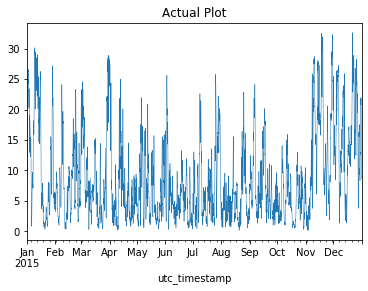

In [63]:
# plotting the actual generation plot
windgenerationtest.plot(linewidth=0.5, title='Actual Plot', legend=False)

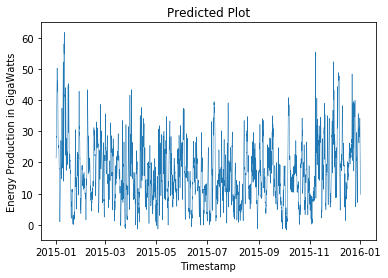

In [64]:
#plotting the predicted values
plt.plot(timeseries,prediction, linewidth=0.5)
plt.xlabel('Timestamp')
plt.ylabel('Energy Production in GigaWatts')
plt.title('Predicted Plot')
plt.show()

In [65]:
print(r2_score(windgenDKtest, prediction))

-454.0163597302531


In [66]:
print(mean_squared_error(windgenDKtest, prediction))

335.55604129902457


In [67]:
energy_production(windgenDKtest)

Energy Data measured in Giga Watts
Total energy: DK_wind_onshore_generation_actual    9301.4969
dtype: float64
Average Energy Per Hour: DK_wind_onshore_generation_actual    1.061815
dtype: float64
Average Energy Per Day: DK_wind_onshore_generation_actual    25.483553
dtype: float64


In [68]:
energy_production(prediction)

Energy Data measured in Giga Watts
Total energy: 148832.25679764038
Average Energy Per Hour: 16.989983652698673
Average Energy Per Day: 407.75960766476817


In [39]:
print(windspeedDK)

                           DK_windspeed_10m
utc_timestamp                              
1980-01-01 00:00:00+00:00              4.18
1980-01-01 01:00:00+00:00              4.19
1980-01-01 02:00:00+00:00              4.16
1980-01-01 03:00:00+00:00              4.06
1980-01-01 04:00:00+00:00              3.92
...                                     ...
2016-12-31 19:00:00+00:00              9.52
2016-12-31 20:00:00+00:00              9.74
2016-12-31 21:00:00+00:00              9.93
2016-12-31 22:00:00+00:00              9.98
2016-12-31 23:00:00+00:00             10.12

[324360 rows x 1 columns]
